In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, Activation
from tensorflow.keras.layers import BatchNormalization, Embedding, TimeDistributed, LeakyReLU
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn import metrics as ms
from tensorflow.keras import regularizers

from matplotlib import pyplot
from pickle import load
from sklearn import metrics as ms
from sklearn.metrics import confusion_matrix,accuracy_score, average_precision_score, f1_score, recall_score

# X_train = np.load("./saveData/IBM/X_train.npy", allow_pickle=True)
# y_train = np.load("./saveData/IBM/y_train.npy", allow_pickle=True)
# X_test = np.load("./saveData/IBM/X_test.npy", allow_pickle=True)
# y_test = np.load("./saveData/IBM/y_test.npy", allow_pickle=True)
# X_val = np.load("./saveData/IBM/X_val.npy", allow_pickle=True)
# y_val = np.load("./saveData/IBM/y_val.npy", allow_pickle=True)

# X_train = np.load("./saveData/TSLA/X_train.npy", allow_pickle=True)
# y_train = np.load("./saveData/TSLA/y_train.npy", allow_pickle=True)
# X_test = np.load("./saveData/TSLA/X_test.npy", allow_pickle=True)
# y_test = np.load("./saveData/TSLA/y_test.npy", allow_pickle=True)
# X_val = np.load("./saveData/TSLA/X_val.npy", allow_pickle=True)
# y_val = np.load("./saveData/TSLA/y_val.npy", allow_pickle=True)

# X_train = np.load("./saveData/S&P500/X_train.npy", allow_pickle=True)
# y_train = np.load("./saveData/S&P500/y_train.npy", allow_pickle=True)
# X_test = np.load("./saveData/S&P500/X_test.npy", allow_pickle=True)
# y_test = np.load("./saveData/S&P500/y_test.npy", allow_pickle=True)
# X_val = np.load("./saveData/S&P500/X_val.npy", allow_pickle=True)
# y_val = np.load("./saveData/S&P500/y_val.npy", allow_pickle=True)

X_train = np.load("./saveData/PAICC/X_train.npy", allow_pickle=True)
y_train = np.load("./saveData/PAICC/y_train.npy", allow_pickle=True)
X_test = np.load("./saveData/PAICC/X_test.npy", allow_pickle=True)
y_test = np.load("./saveData/PAICC/y_test.npy", allow_pickle=True)
X_val = np.load("./saveData/PAICC/X_val.npy", allow_pickle=True)
y_val = np.load("./saveData/PAICC/y_val.npy", allow_pickle=True)

# X_train = np.load("./saveData/X_train.npy", allow_pickle=True)
# y_train = np.load("./saveData/y_train.npy", allow_pickle=True)
# X_test = np.load("./saveData/X_test.npy", allow_pickle=True)
# y_test = np.load("./saveData/y_test.npy", allow_pickle=True)
# X_val = np.load("./saveData/X_val.npy", allow_pickle=True)
# y_val = np.load("./saveData/y_val.npy", allow_pickle=True)


# X_train = np.load("./saveData/MSFT/X_train.npy", allow_pickle=True)
# y_train = np.load("./saveData/MSFT/y_train.npy", allow_pickle=True)
# X_test = np.load("./saveData/MSFT/X_test.npy", allow_pickle=True)
# y_test = np.load("./saveData/MSFT/y_test.npy", allow_pickle=True)
# X_val = np.load("./saveData/MSFT/X_val.npy", allow_pickle=True)
# y_val = np.load("./saveData/MSFT/y_val.npy", allow_pickle=True)

# X_train = np.load("./saveData/SSE/X_train.npy", allow_pickle=True)
# y_train = np.load("./saveData/SSE/y_train.npy", allow_pickle=True)
# X_test = np.load("./saveData/SSE/X_test.npy", allow_pickle=True)
# y_test = np.load("./saveData/SSE/y_test.npy", allow_pickle=True)
# X_val = np.load("./saveData/SSE/X_val.npy", allow_pickle=True)
# y_val = np.load("./saveData/SSE/y_val.npy", allow_pickle=True)

# X_train = np.load("./saveData/IBM/X_train.npy", allow_pickle=True)
# y_train = np.load("./saveData/IBM/y_train.npy", allow_pickle=True)
# X_test = np.load("./saveData/IBM/X_test.npy", allow_pickle=True)
# y_test = np.load("./saveData/IBM/y_test.npy", allow_pickle=True)
# X_val = np.load("./saveData/IBM/X_val.npy", allow_pickle=True)
# y_val = np.load("./saveData/IBM/y_val.npy", allow_pickle=True)
# yc_train = np.load("./saveData/yc_train.npy", allow_pickle=True)
# yc_test = np.load("./saveData/yc_test.npy", allow_pickle=True)

In [2]:
y_train

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [3]:
dict_count = {}
dict_count['跌']=0
dict_count['涨']=0
dict_count['平']=0
for i in range(len(y_train)):
    if(y_train[i][0] ==1):
        dict_count['跌'] += 1
    if(y_train[i][1] == 1):
        dict_count['平'] += 1
    if(y_train[i][2] == 1):
        dict_count['涨'] += 1
print(dict_count)

{'跌': 1040, '涨': 1040, '平': 607}


In [4]:
dict_count = {}
dict_count['跌']=0
dict_count['涨']=0
dict_count['平']=0
for i in range(len(y_val)):
    if(y_val[i][0] ==1):
        dict_count['跌'] += 1
    if(y_val[i][1] == 1):
        dict_count['平'] += 1
    if(y_val[i][2] == 1):
        dict_count['涨'] += 1
print(dict_count)

{'跌': 114, '涨': 112, '平': 34}


In [5]:
dict_count = {}
dict_count['跌']=0
dict_count['涨']=0
dict_count['平']=0
for i in range(len(y_test)):
    if(y_test[i][0] ==1):
        dict_count['跌'] += 1
    if(y_test[i][1] == 1):
        dict_count['平'] += 1
    if(y_test[i][2] == 1):
        dict_count['涨'] += 1
print(dict_count)

{'跌': 230, '涨': 224, '平': 66}


In [6]:
dict_count

{'跌': 230, '涨': 224, '平': 66}

In [7]:
y_train.shape[1]

3

In [8]:
# X_train = X_train[0:5001]
# y_train = y_train[0:5001]
# X_test = X_test[0:5001]
# y_test = y_test[0:5001]
# X_val = X_val[0:5001]
# y_val = y_val[0:5001]

In [9]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
min_delta_val = 0.0001
lr_cb = ReduceLROnPlateau(monitor = 'val_loss',  
                          factor = 0.5, min_delta = min_delta_val, patience = 10, verbose = 1)
es_cb = EarlyStopping(monitor = 'accuracy', 
                      min_delta=min_delta_val, patience = 30, verbose = 1, restore_best_weights = True, mode='max')

callbacks_model = [lr_cb, es_cb]


In [10]:


#Parameters
LR = 0.001
BATCH_SIZE = 60
N_EPOCH = 1000
dropout = 0.2
input_dim = X_train.shape[1]
feature_size = X_train.shape[2]
#做3分类
output_dim = y_train.shape[1]

#output_dim = 3

# METRICS = [
#       keras.metrics.TruePositives(name='tp'),
#       keras.metrics.FalsePositives(name='fp'),
#       keras.metrics.TrueNegatives(name='tn'),
#       keras.metrics.FalseNegatives(name='fn'), 
#       keras.metrics.CategoricalAccuracy(name='accuracy'),
#       keras.metrics.Precision(name='precision'),
#       keras.metrics.Recall(name='recall'),
#       keras.metrics.AUC(name='auc'),
#       keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
# ]

METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.CategoricalAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def basic_lstm(input_dim, feature_size):
    print("model dim: ", input_dim, output_dim)
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(input_dim,feature_size), batch_size=None))
    #model.add(tf.keras.layers.GaussianNoise(stddev=0.2))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(dropout))
    model.add(LSTM(64))
    model.add(Dropout(dropout))
    model.add(Dense(output_dim, activation='softmax'))
    #model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr = LR),metrics=METRICS)
#     model = Sequential()
#     model.add(Bidirectional(LSTM(units= 128), input_shape=(input_dim, feature_size)))
#     model.add(Dense(64))
#     model.add(Dense(units=output_dim,activation='softmax'))
#     model.compile(optimizer=Adam(lr = LR), loss='mse')
    history = model.fit(X_train, y_train, epochs=N_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_val, y_val),
                        verbose=1, shuffle=False , callbacks=callbacks_model)
    #, callbacks=callbacks_model

    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='validation')
    pyplot.legend()
    pyplot.show()
    return model,history





In [11]:
X_train.shape

(2687, 30, 12)

In [12]:
y_train.shape

(2687, 3)

In [13]:
X_val.shape

(260, 30, 12)

In [14]:
y_val.shape

(260, 3)

In [15]:
y_train

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [16]:
X_train


array([[[-0.99838188, -0.99893617, -0.9994429 , ..., -0.99343362,
         -0.99877139, -0.9991334 ],
        [-1.        , -1.        , -1.        , ..., -0.99355887,
         -0.9994742 , -0.99950901],
        [-0.99892125, -1.        , -1.        , ..., -0.99404034,
         -0.99980519, -1.        ],
        ...,
        [-0.99406688, -0.99414894, -0.99442897, ..., -0.99804901,
         -0.99316258, -0.99412391],
        [-0.99406688, -0.99148936, -0.99442897, ..., -0.99780903,
         -0.99308777, -0.99235234],
        [-0.99190939, -0.99095745, -0.99275766, ..., -0.99720233,
         -0.99315325, -0.99103024]],

       [[-1.        , -1.        , -1.        , ..., -0.99355887,
         -0.9994742 , -0.99950901],
        [-0.99892125, -1.        , -1.        , ..., -0.99404034,
         -0.99980519, -1.        ],
        [-1.        , -1.        , -1.        , ..., -0.99483489,
         -1.        , -0.99979787],
        ...,
        [-0.99406688, -0.99148936, -0.99442897, ..., -

model dim:  30 3
Epoch 1/1000
45/45 [==============================] - 6s 134ms/step - loss: 1.0967 - tp: 469.0000 - fp: 624.0000 - tn: 4750.0000 - fn: 2218.0000 - accuracy: 0.4138 - precision: 0.4291 - recall: 0.1745 - auc: 0.6175 - prc: 0.4133 - val_loss: 1.0161 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 520.0000 - val_fn: 260.0000 - val_accuracy: 0.4731 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6711 - val_prc: 0.4490
Epoch 2/1000
45/45 [==============================] - 3s 64ms/step - loss: 1.0941 - tp: 200.0000 - fp: 354.0000 - tn: 5020.0000 - fn: 2487.0000 - accuracy: 0.3532 - precision: 0.3610 - recall: 0.0744 - auc: 0.5744 - prc: 0.3718 - val_loss: 0.9978 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 520.0000 - val_fn: 260.0000 - val_accuracy: 0.4308 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6604 - val_prc: 0.4484
Epoch 3/1000
45/45 [==============================] - 3s 69ms/step - loss: 1.1144 - tp: 136.0000 - fp: 2

Epoch 19/1000
45/45 [==============================] - 3s 68ms/step - loss: 1.0324 - tp: 115.0000 - fp: 136.0000 - tn: 5238.0000 - fn: 2572.0000 - accuracy: 0.4179 - precision: 0.4582 - recall: 0.0428 - auc: 0.6328 - prc: 0.4206 - val_loss: 0.9888 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 520.0000 - val_fn: 260.0000 - val_accuracy: 0.4385 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6703 - val_prc: 0.4514
Epoch 20/1000
45/45 [==============================] - 3s 66ms/step - loss: 0.9981 - tp: 148.0000 - fp: 151.0000 - tn: 5223.0000 - fn: 2539.0000 - accuracy: 0.4860 - precision: 0.4950 - recall: 0.0551 - auc: 0.6684 - prc: 0.4482 - val_loss: 0.9891 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 520.0000 - val_fn: 260.0000 - val_accuracy: 0.4654 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6720 - val_prc: 0.4465
Epoch 21/1000
45/45 [==============================] - 3s 70ms/step - loss: 0.9846 - tp: 153.0000 - fp: 143.0000 - tn: 5

Epoch 38/1000
45/45 [==============================] - 3s 67ms/step - loss: 0.9696 - tp: 508.0000 - fp: 373.0000 - tn: 5001.0000 - fn: 2179.0000 - accuracy: 0.4872 - precision: 0.5766 - recall: 0.1891 - auc: 0.6960 - prc: 0.4986 - val_loss: 0.9867 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 520.0000 - val_fn: 260.0000 - val_accuracy: 0.4615 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6802 - val_prc: 0.4627
Epoch 39/1000
45/45 [==============================] - 3s 66ms/step - loss: 0.9685 - tp: 468.0000 - fp: 296.0000 - tn: 5078.0000 - fn: 2219.0000 - accuracy: 0.4950 - precision: 0.6126 - recall: 0.1742 - auc: 0.7019 - prc: 0.5124 - val_loss: 0.9869 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 520.0000 - val_fn: 260.0000 - val_accuracy: 0.4500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6785 - val_prc: 0.4604
Epoch 40/1000
45/45 [==============================] - 3s 64ms/step - loss: 0.9662 - tp: 507.0000 - fp: 384.0000 - tn: 4

45/45 [==============================] - 3s 65ms/step - loss: 0.9592 - tp: 449.0000 - fp: 273.0000 - tn: 5101.0000 - fn: 2238.0000 - accuracy: 0.4953 - precision: 0.6219 - recall: 0.1671 - auc: 0.7028 - prc: 0.5173 - val_loss: 0.9843 - val_tp: 8.0000 - val_fp: 9.0000 - val_tn: 511.0000 - val_fn: 252.0000 - val_accuracy: 0.4385 - val_precision: 0.4706 - val_recall: 0.0308 - val_auc: 0.6671 - val_prc: 0.4536
Epoch 57/1000
45/45 [==============================] - 3s 65ms/step - loss: 0.9526 - tp: 454.0000 - fp: 270.0000 - tn: 5104.0000 - fn: 2233.0000 - accuracy: 0.4927 - precision: 0.6271 - recall: 0.1690 - auc: 0.7104 - prc: 0.5266 - val_loss: 0.9846 - val_tp: 6.0000 - val_fp: 5.0000 - val_tn: 515.0000 - val_fn: 254.0000 - val_accuracy: 0.4385 - val_precision: 0.5455 - val_recall: 0.0231 - val_auc: 0.6659 - val_prc: 0.4528
Epoch 58/1000
45/45 [==============================] - 3s 73ms/step - loss: 0.9608 - tp: 461.0000 - fp: 291.0000 - tn: 5083.0000 - fn: 2226.0000 - accuracy: 0.4994 - 

Epoch 74/1000
45/45 [==============================] - 3s 73ms/step - loss: 0.9452 - tp: 475.0000 - fp: 283.0000 - tn: 5091.0000 - fn: 2212.0000 - accuracy: 0.4953 - precision: 0.6266 - recall: 0.1768 - auc: 0.7163 - prc: 0.5359 - val_loss: 0.9872 - val_tp: 8.0000 - val_fp: 10.0000 - val_tn: 510.0000 - val_fn: 252.0000 - val_accuracy: 0.4385 - val_precision: 0.4444 - val_recall: 0.0308 - val_auc: 0.6638 - val_prc: 0.4520
Epoch 75/1000
45/45 [==============================] - 4s 78ms/step - loss: 0.9450 - tp: 473.0000 - fp: 274.0000 - tn: 5100.0000 - fn: 2214.0000 - accuracy: 0.5006 - precision: 0.6332 - recall: 0.1760 - auc: 0.7169 - prc: 0.5335 - val_loss: 0.9873 - val_tp: 8.0000 - val_fp: 10.0000 - val_tn: 510.0000 - val_fn: 252.0000 - val_accuracy: 0.4385 - val_precision: 0.4444 - val_recall: 0.0308 - val_auc: 0.6629 - val_prc: 0.4518
Epoch 76/1000
45/45 [==============================] - 3s 74ms/step - loss: 0.9427 - tp: 493.0000 - fp: 283.0000 - tn: 5091.0000 - fn: 2194.0000 - acc

Epoch 92/1000
45/45 [==============================] - 3s 63ms/step - loss: 0.9423 - tp: 468.0000 - fp: 279.0000 - tn: 5095.0000 - fn: 2219.0000 - accuracy: 0.4909 - precision: 0.6265 - recall: 0.1742 - auc: 0.7175 - prc: 0.5367 - val_loss: 0.9888 - val_tp: 8.0000 - val_fp: 9.0000 - val_tn: 511.0000 - val_fn: 252.0000 - val_accuracy: 0.4385 - val_precision: 0.4706 - val_recall: 0.0308 - val_auc: 0.6643 - val_prc: 0.4541
Epoch 93/1000
45/45 [==============================] - 3s 64ms/step - loss: 0.9427 - tp: 456.0000 - fp: 284.0000 - tn: 5090.0000 - fn: 2231.0000 - accuracy: 0.4916 - precision: 0.6162 - recall: 0.1697 - auc: 0.7164 - prc: 0.5327 - val_loss: 0.9888 - val_tp: 7.0000 - val_fp: 9.0000 - val_tn: 511.0000 - val_fn: 253.0000 - val_accuracy: 0.4385 - val_precision: 0.4375 - val_recall: 0.0269 - val_auc: 0.6656 - val_prc: 0.4559
Epoch 94/1000
45/45 [==============================] - 3s 63ms/step - loss: 0.9435 - tp: 470.0000 - fp: 282.0000 - tn: 5092.0000 - fn: 2217.0000 - accur

Epoch 110/1000
45/45 [==============================] - 3s 67ms/step - loss: 0.9431 - tp: 461.0000 - fp: 267.0000 - tn: 5107.0000 - fn: 2226.0000 - accuracy: 0.4935 - precision: 0.6332 - recall: 0.1716 - auc: 0.7165 - prc: 0.5332 - val_loss: 0.9890 - val_tp: 7.0000 - val_fp: 9.0000 - val_tn: 511.0000 - val_fn: 253.0000 - val_accuracy: 0.4385 - val_precision: 0.4375 - val_recall: 0.0269 - val_auc: 0.6645 - val_prc: 0.4535
Epoch 111/1000
45/45 [==============================] - 3s 66ms/step - loss: 0.9442 - tp: 461.0000 - fp: 291.0000 - tn: 5083.0000 - fn: 2226.0000 - accuracy: 0.4931 - precision: 0.6130 - recall: 0.1716 - auc: 0.7154 - prc: 0.5308 - val_loss: 0.9890 - val_tp: 7.0000 - val_fp: 9.0000 - val_tn: 511.0000 - val_fn: 253.0000 - val_accuracy: 0.4385 - val_precision: 0.4375 - val_recall: 0.0269 - val_auc: 0.6641 - val_prc: 0.4529
Epoch 112/1000
45/45 [==============================] - 3s 69ms/step - loss: 0.9410 - tp: 477.0000 - fp: 271.0000 - tn: 5103.0000 - fn: 2210.0000 - ac

Epoch 129/1000
45/45 [==============================] - ETA: 0s - loss: 0.9420 - tp: 463.0000 - fp: 265.0000 - tn: 5109.0000 - fn: 2224.0000 - accuracy: 0.5032 - precision: 0.6360 - recall: 0.1723 - auc: 0.7182 - prc: 0.5361
Epoch 00129: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.
45/45 [==============================] - 3s 65ms/step - loss: 0.9420 - tp: 463.0000 - fp: 265.0000 - tn: 5109.0000 - fn: 2224.0000 - accuracy: 0.5032 - precision: 0.6360 - recall: 0.1723 - auc: 0.7182 - prc: 0.5361 - val_loss: 0.9891 - val_tp: 7.0000 - val_fp: 9.0000 - val_tn: 511.0000 - val_fn: 253.0000 - val_accuracy: 0.4385 - val_precision: 0.4375 - val_recall: 0.0269 - val_auc: 0.6632 - val_prc: 0.4520
Epoch 130/1000
45/45 [==============================] - 3s 63ms/step - loss: 0.9430 - tp: 466.0000 - fp: 272.0000 - tn: 5102.0000 - fn: 2221.0000 - accuracy: 0.4961 - precision: 0.6314 - recall: 0.1734 - auc: 0.7166 - prc: 0.5311 - val_loss: 0.9891 - val_tp: 7.0000 - val_fp: 9.0000 - 

Epoch 147/1000
45/45 [==============================] - 3s 61ms/step - loss: 0.9411 - tp: 475.0000 - fp: 271.0000 - tn: 5103.0000 - fn: 2212.0000 - accuracy: 0.5013 - precision: 0.6367 - recall: 0.1768 - auc: 0.7202 - prc: 0.5395 - val_loss: 0.9891 - val_tp: 7.0000 - val_fp: 9.0000 - val_tn: 511.0000 - val_fn: 253.0000 - val_accuracy: 0.4385 - val_precision: 0.4375 - val_recall: 0.0269 - val_auc: 0.6637 - val_prc: 0.4523
Epoch 148/1000
45/45 [==============================] - 3s 65ms/step - loss: 0.9409 - tp: 494.0000 - fp: 272.0000 - tn: 5102.0000 - fn: 2193.0000 - accuracy: 0.5024 - precision: 0.6449 - recall: 0.1838 - auc: 0.7214 - prc: 0.5421 - val_loss: 0.9891 - val_tp: 7.0000 - val_fp: 9.0000 - val_tn: 511.0000 - val_fn: 253.0000 - val_accuracy: 0.4385 - val_precision: 0.4375 - val_recall: 0.0269 - val_auc: 0.6637 - val_prc: 0.4523
Epoch 149/1000
45/45 [==============================] - ETA: 0s - loss: 0.9419 - tp: 485.0000 - fp: 271.0000 - tn: 5103.0000 - fn: 2202.0000 - accurac

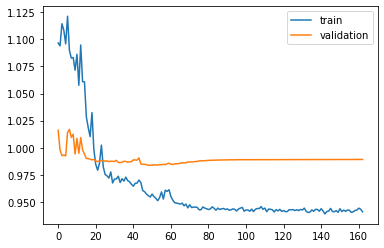

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 128)           72192     
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 64)            49408     
_________________________________________________________________
dropout (Dropout)            (None, 30, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 154,819
Trainable params: 154,819
Non-trainable params: 0
__________________________________________________

In [17]:
model,history= basic_lstm(input_dim, feature_size)
model.save('./saveModel/LSTM_3to1.h5')
print(model.summary())


In [18]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'auc', 'prc', 'val_loss', 'val_tp', 'val_fp', 'val_tn', 'val_fn', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_prc', 'lr'])

In [19]:
acc = history_dict['accuracy']

In [20]:
acc

[0.41384443640708923,
 0.35318198800086975,
 0.34350576996803284,
 0.3796055018901825,
 0.3684406280517578,
 0.3959806561470032,
 0.3963527977466583,
 0.38965389132499695,
 0.39560848474502563,
 0.38704875111579895,
 0.40193524956703186,
 0.3781168460845947,
 0.40975064039230347,
 0.39411982893943787,
 0.40193524956703186,
 0.3970971405506134,
 0.3978414535522461,
 0.4064011871814728,
 0.417938232421875,
 0.48604390025138855,
 0.48343878984451294,
 0.4830666184425354,
 0.4771120250225067,
 0.45217713713645935,
 0.4700409471988678,
 0.48083364963531494,
 0.47897282242774963,
 0.4908820390701294,
 0.48790472745895386,
 0.48790472745895386,
 0.48418310284614563,
 0.48195013403892517,
 0.49460363388061523,
 0.4864160716533661,
 0.48716041445732117,
 0.48790472745895386,
 0.46966877579689026,
 0.48716041445732117,
 0.4949758052825928,
 0.4923706650733948,
 0.48343878984451294,
 0.4771120250225067,
 0.4759955406188965,
 0.46855229139328003,
 0.4767398536205292,
 0.49646446108818054,
 0.49720

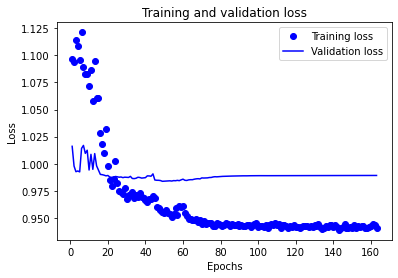

In [21]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# “bo”代表 "蓝点"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b代表“蓝色实线”
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

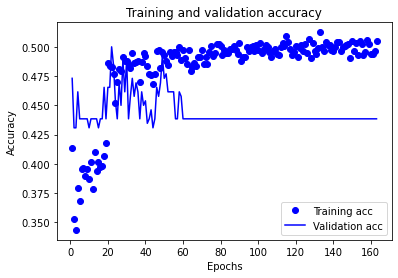

In [22]:
plt.clf()   # 清除数字
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [24]:
def plot_metrics(history):
    metrics = ['loss', 'prc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8,1])
        else:
            plt.ylim([0,1])

        plt.legend()

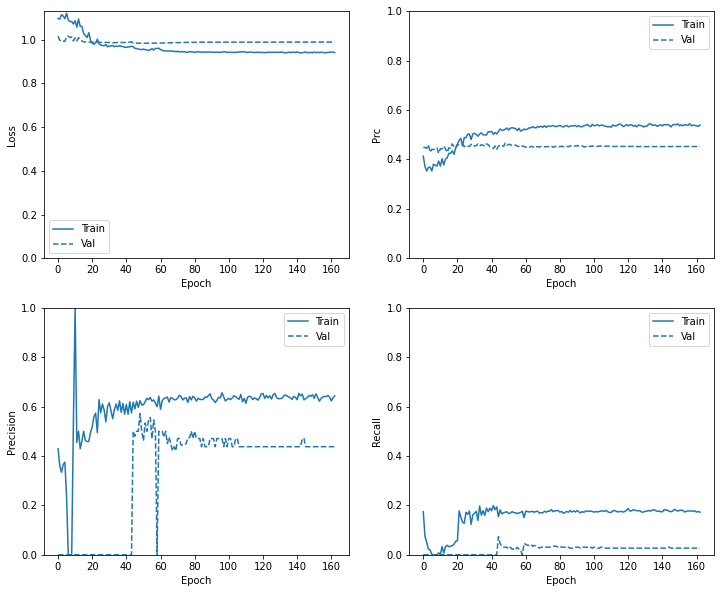

In [25]:
plot_metrics(history)

### Note: That the validation curve generally performs better than the training curve. This is mainly caused by the fact that the dropout layer is not active when evaluating the model.


### Evaluate metrics 
### You can use a confusion matrix to summarize the actual vs. predicted labels where the X axis is the predicted label  and the Y axis is the actual label.

In [26]:
train_predictions_baseline = model.predict(X_train, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(X_test, batch_size=BATCH_SIZE)

In [27]:
baseline_results = model.evaluate(X_test, y_test,
                                  batch_size=BATCH_SIZE, verbose=1)
for name, value in zip(model.metrics_names, baseline_results):
    print(name, ': ', value)
print()

#plot_cm(y_test, test_predictions_baseline)

9/9 [==============================] - 0s 20ms/step - loss: 1.0181 - tp: 170.0000 - fp: 187.0000 - tn: 853.0000 - fn: 350.0000 - accuracy: 0.4442 - precision: 0.4762 - recall: 0.3269 - auc: 0.6808 - prc: 0.4605  
loss :  1.0180671215057373
tp :  170.0
fp :  187.0
tn :  853.0
fn :  350.0
accuracy :  0.4442307651042938
precision :  0.4761904776096344
recall :  0.32692307233810425
auc :  0.6807534694671631
prc :  0.4604937434196472



# 绘制ROC曲线

In [28]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.preprocessing import label_binarize


In [29]:
#同时也是分类得分y_score
#概率矩阵P和标签矩阵L分别对应代码中的y_score和y_one_hot：
yhat = model.predict(X_test, verbose=1)


17/17 [==============================] - 0s 15ms/step


In [30]:
from sklearn.preprocessing import label_binarize


In [31]:
y_test

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [32]:
dict_count = {}
dict_count['跌']=0
dict_count['涨']=0
dict_count['平']=0
for i in range(len(y_test)):
    if(y_test[i][0] ==1):
        dict_count['跌'] += 1
    if(y_test[i][1] == 1):
        dict_count['平'] += 1
    if(y_test[i][2] == 1):
        dict_count['涨'] += 1

In [33]:
dict_count

{'跌': 230, '涨': 224, '平': 66}

In [34]:
yhat

array([[0.46452615, 0.1231234 , 0.41235048],
       [0.46436042, 0.12338014, 0.41225934],
       [0.46424782, 0.12345187, 0.41230035],
       ...,
       [0.5534611 , 0.02505807, 0.4214809 ],
       [0.55297035, 0.02506474, 0.42196497],
       [0.55244255, 0.02506463, 0.42249286]], dtype=float32)

调用函数auc： 0.679219674556213
手动计算auc： 0.679219674556213


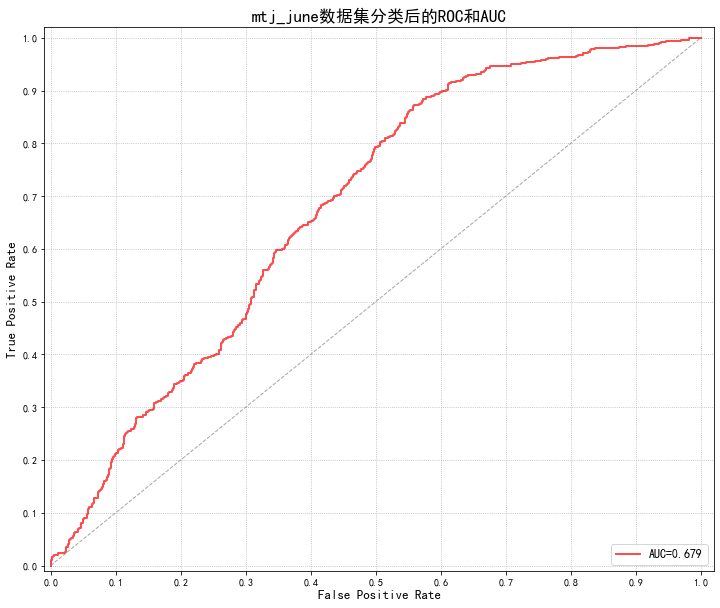

In [35]:
# 计算属于各个类别的概率，返回值的shape = [n_samples, n_classes]
y_score = model.predict(X_test)
# 1、调用函数计算micro类型的AUC
print('调用函数auc：', metrics.roc_auc_score(y_test, y_score, average='micro'))
# 2、手动计算micro类型的AUC
#首先将矩阵y_one_hot和y_score展开，然后计算假正例率FPR和真正例率TPR
fpr, tpr, thresholds = metrics.roc_curve(y_test.ravel(),y_score.ravel())
auc = metrics.auc(fpr, tpr)
print('手动计算auc：', auc)
#绘图
mpl.rcParams['font.sans-serif'] = u'SimHei'
mpl.rcParams['axes.unicode_minus'] = False
#FPR就是横坐标,TPR就是纵坐标
plt.plot(fpr, tpr, c = 'r', lw = 2, alpha = 0.7, label = u'AUC=%.3f' % auc)
plt.plot((0, 1), (0, 1), c = '#808080', lw = 1, ls = '--', alpha = 0.7)
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.grid(b=True, ls=':')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
plt.title(u'mtj_june数据集分类后的ROC和AUC', fontsize=17)
plt.show()

In [36]:
y_score

array([[0.46452615, 0.1231234 , 0.41235048],
       [0.46436042, 0.12338014, 0.41225934],
       [0.46424782, 0.12345187, 0.41230035],
       ...,
       [0.5534611 , 0.02505807, 0.4214809 ],
       [0.55297035, 0.02506474, 0.42196497],
       [0.55244255, 0.02506463, 0.42249286]], dtype=float32)

In [37]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, average_precision_score,precision_score,f1_score,recall_score

In [38]:
yhat

array([[0.46452615, 0.1231234 , 0.41235048],
       [0.46436042, 0.12338014, 0.41225934],
       [0.46424782, 0.12345187, 0.41230035],
       ...,
       [0.5534611 , 0.02505807, 0.4214809 ],
       [0.55297035, 0.02506474, 0.42196497],
       [0.55244255, 0.02506463, 0.42249286]], dtype=float32)

In [39]:
y_test

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [40]:
y_score

array([[0.46452615, 0.1231234 , 0.41235048],
       [0.46436042, 0.12338014, 0.41225934],
       [0.46424782, 0.12345187, 0.41230035],
       ...,
       [0.5534611 , 0.02505807, 0.4214809 ],
       [0.55297035, 0.02506474, 0.42196497],
       [0.55244255, 0.02506463, 0.42249286]], dtype=float32)

In [41]:
def to_0_1(y):
    res = []
    for i in range(y.shape[0]):
        if(y[i][0] > y[i][1] and y[i][0] > y[i][2]):
            res.append(-1) #跌
        if(y[i][1] > y[i][0] and y[i][1] > y[i][2]):
            res.append(0) #平
        if(y[i][2] > y[i][0] and y[i][2] > y[i][1]):
            res.append(1) #涨
    return np.array(res)

def result_to_0_1(y):
        if(tf.is_tensor(y)):
            y = y.numpy()
            for i in range(y.shape[0]):
                max_index = 0
                if(y[i][max_index] < y[i][1]):
                    max_index = 1
                if(y[i][max_index] < y[i][2]):
                    max_index = 2
                list_temp = [0,1,2]
                list_temp.pop(max_index)
                y[i][max_index] = 1
                y[i][list_temp[0]] = 0
                y[i][list_temp[1]] = 0
        else:
            for i in range(y.shape[0]):
                max_index = 0
                if(y[i][max_index] < y[i][1]):
                    max_index = 1
                if(y[i][max_index] < y[i][2]):
                    max_index = 2
                list_temp = [0,1,2]
                list_temp.pop(max_index)
                y[i][max_index] = 1
                y[i][list_temp[0]] = 0
                y[i][list_temp[1]] = 0
        return y
    

In [42]:
y = result_to_0_1(yhat)

In [43]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [44]:
y_pre = to_0_1(yhat)
y_true = to_0_1(y_test)

In [45]:
y_pre

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [46]:
y_true

array([ 0,  1,  1, -1, -1,  1,  0, -1,  0, -1, -1, -1,  0,  1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  0, -1, -1,  0,  1,  0,  1,  0,  1,  0,  0,
        0,  1, -1,  1, -1,  0,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
        1,  0,  0,  1,  0,  1, -1,  1,  0, -1,  0,  1,  1,  0, -1, -1, -1,
       -1,  0,  0,  1,  1,  0, -1,  0,  1,  1,  0,  1,  0,  1,  1, -1,  1,
        1, -1,  1,  0,  1, -1, -1,  0, -1, -1, -1, -1,  1, -1, -1,  0,  1,
        0,  1,  1,  1,  1, -1,  0, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  0,  1, -1,  1, -1,  1,  1, -1,  1,  0,  1,  0, -1,
        1, -1, -1,  0,  1, -1,  0,  1,  0,  1, -1, -1,  1, -1,  1, -1,  1,
        1, -1,  1,  1, -1,  1,  1,  1,  1,  0,  0, -1,  1, -1,  0,  1, -1,
        1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  0,  0,  1, -1, -1,  0, -1,  1,  0, -1,  1,  0,  1,  1, -1,  1,
        1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1,
        0,  1,  1,  1, -1

In [47]:
y_test

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [48]:
cm = confusion_matrix(y_true, y_pre)
conf_matrix = pd.DataFrame(cm, index=['跌','平','涨'], columns=['跌','平','涨'])


In [49]:
cm

array([[224,   0,   6],
       [ 63,   0,   3],
       [217,   0,   7]], dtype=int64)

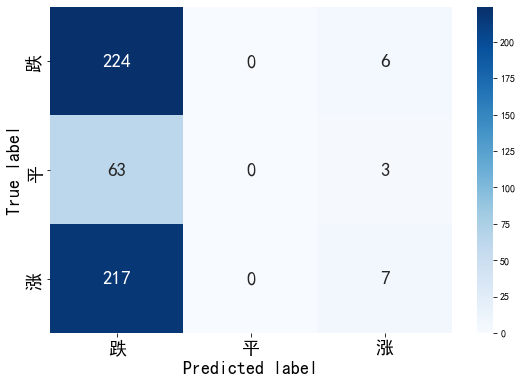

In [50]:
# plot size setting
fig, ax = plt.subplots(figsize = (9,6))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 19},fmt='.20g', cmap="Blues")
plt.ylabel('True label', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('confusion.pdf', bbox_inches='tight')
plt.show()

In [51]:
print('------Weighted------')
print('Weighted precision', precision_score(y_true, y_pre, average='weighted'))
print('Weighted recall', recall_score(y_true, y_pre, average='weighted'))
print('Weighted f1-score', f1_score(y_true, y_pre, average='weighted'))
print('------Macro------')
print('Macro precision', precision_score(y_true, y_pre, average='macro'))
print('Macro recall', recall_score(y_true, y_pre, average='macro'))
print('Macro f1-score', f1_score(y_true, y_pre, average='macro'))
print('------Micro------')
print('Micro precision', precision_score(y_true, y_pre, average='micro'))
print('Micro recall', recall_score(y_true, y_pre, average='micro'))
print('Micro f1-score', f1_score(y_true, y_pre, average='micro'))

------Weighted------
Weighted precision 0.38504273504273506
Weighted recall 0.4442307692307692
Weighted f1-score 0.29509257318521626
------Macro------
Macro precision 0.29398148148148145
Macro recall 0.335054347826087
Macro f1-score 0.2228958522555253
------Micro------
Micro precision 0.4442307692307692
Micro recall 0.4442307692307692
Micro f1-score 0.44423076923076915


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-52-c2d5f097c586>:29: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


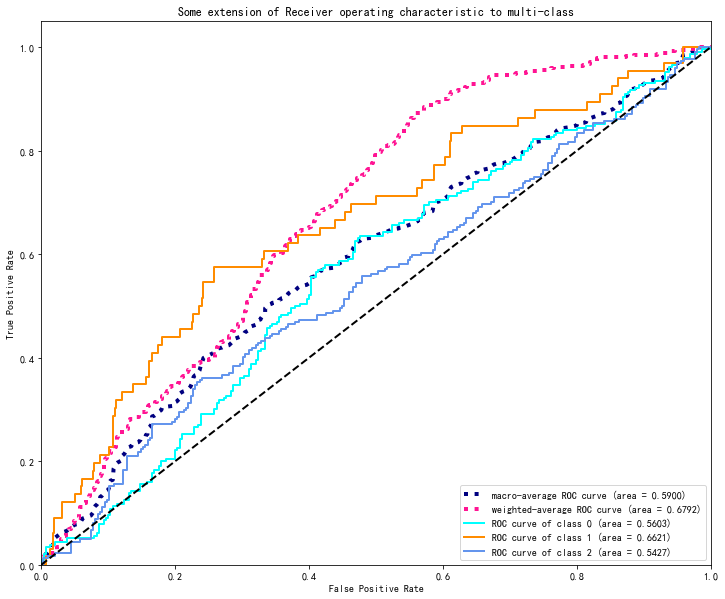

In [52]:
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area（方法二）
fpr["weighted"], tpr["weighted"], _ = roc_curve(
    y_test.ravel(), y_score.ravel())
roc_auc["weighted"] = metrics.auc(fpr["weighted"], tpr["weighted"])


# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw = 2
plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.4f})'
#          ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
         ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
plt.plot(fpr["weighted"], tpr["weighted"],
         label='weighted-average ROC curve (area = {0:0.4f})'
         ''.format(roc_auc["weighted"]),
         color='deeppink', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
# # 计算每一类的ROC
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# n_classes=3
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])
# # Compute micro-average ROC curve and ROC area（方法二）
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# # Compute macro-average ROC curve and ROC area（方法一）
# # First aggregate all false positive rates
# all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# # Then interpolate all ROC curves at this points
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(n_classes):
#     mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# # Finally average it and compute AUC
# mean_tpr /= n_classes
# fpr["macro"] = all_fpr
# tpr["macro"] = mean_tpr
# roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# # Plot all ROC curves
# lw=2
# plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.4f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.4f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

# colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of class {0} (area = {1:0.4f})'
#              ''.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Some extension of Receiver operating characteristic to multi-class')
# plt.legend(loc="lower right")
# plt.show()

In [53]:
y_test

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [54]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)